In [25]:
# ==============================================================
# 📘 Machine_Learning_Assignment_Random_Forest --> Python Basic To Advanced
# Author: Muhammad Shah Asyraf
# Credit: Yash Sharma
# Artificial Intelligence & Machine Learning Course
# ==============================================================

In [2]:
# CLASSIFICATION
# RANDOM FOREST

#great choice when you need a strong baseline model that works well
# out of the box

#handle both numerical and categorical features, manage missing values
# gracefully, and are less prone to overfitting than single decision trees.

# You have tabular data with mixed feature types
# You want a robust model without heavy feature scaling or preprocessing
# Interpretability (via feature importance) matters for your application

In [3]:
# Import all libraries

# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [4]:
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [6]:
# load dataset
data = pd.read_csv("bank-additional-full.csv",sep=';')

In [8]:
bank_data = data[['age', 'default', 'cons.price.idx', 'cons.conf.idx', 'y']]

In [9]:
bank_data.head()

,age,default,cons.price.idx,cons.conf.idx,y
0,56,no,93.994,-36.4,no
1,57,unknown,93.994,-36.4,no
2,37,no,93.994,-36.4,no
3,40,no,93.994,-36.4,no
4,56,no,93.994,-36.4,no


In [10]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   default         41188 non-null  object 
 2   cons.price.idx  41188 non-null  float64
 3   cons.conf.idx   41188 non-null  float64
 4   y               41188 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ MB


In [11]:
bank_data.isnull().sum()

,0
age,0
default,0
cons.price.idx,0
cons.conf.idx,0
y,0


In [12]:
bank_data.dtypes

,0
age,int64
default,object
cons.price.idx,float64
cons.conf.idx,float64
y,object


In [13]:
# Step 1 Feature engineering
# Step 2 Split the data
# Step 3 Train the model
# Step 4 Hyperparameter tuning
# Step 5 Assess model performance

In [14]:
# Step 1 Feature engineering
# Preprocessing Data for our Random Forest Classifier

bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

/tmp/ipython-input-2734566790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
/tmp/ipython-input-2734566790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})


In [15]:
# Step 2 Splitting the Data

# Split the data into features (X) and target (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# Fitting and Evaluating the Random Forest Model

# We first create an instance of the Random forest model with the default
# parameters. We then fit this to our training data. We pass both the features
# and the target variable so the model can learn.

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
# At this point, we have a trained random forest model, but we need to find out
# whether it makes accurate predictions.

y_pred = rf.predict(X_test)

In [18]:
# The simplest way to evaluate this model is using accuracy; we
# check the predictions against the actual values in the test set and
# count up how many the model got right.

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8894149065307113


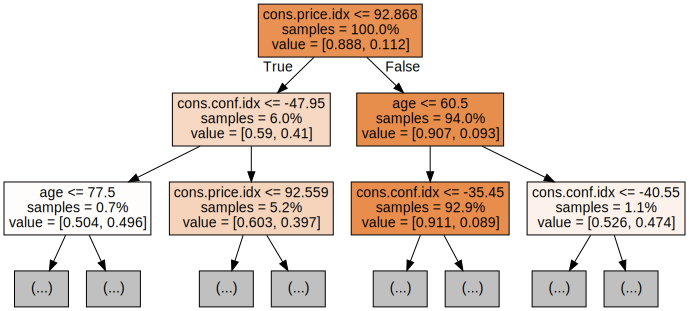

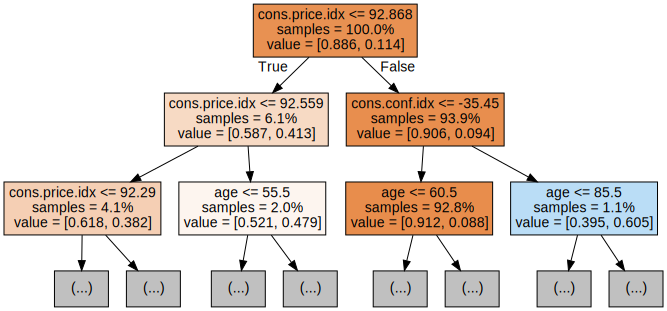

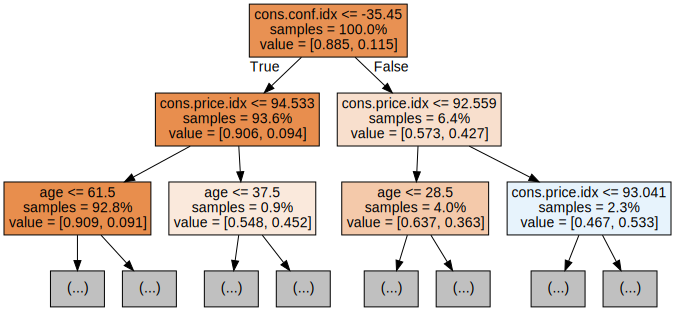

In [19]:
# Visualizing the Results

# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


# Each tree image is limited to only showing the first few nodes.
# These trees can get very large and difficult to visualize. The colors
# represent the majority class of each node (box, with red indicating
# majority 0 (no subscription) and blue indicating majority 1 (subscription).
# The colors get darker the closer the node gets to being fully 0 or 1.
# Each node also contains the following information:

# The variable name and value used for splitting
# The % of total samples in each split
# The % split between classes in each split

In [20]:
# Hyperparameter Tuning

# n_estimators: the number of decision trees in the forest.
# Increasing this hyperparameter generally improves the performance of
# the model but also increases the computational cost of training and
# predicting.

# max_depth: the maximum depth of each decision tree in the forest.
# Setting a higher value for max_depth can lead to overfitting while setting
# it too low can lead to underfitting.

param_dist = {
  'n_estimators': randint(100, 500),
  'max_depth': randint(3, 15),
  'min_samples_split': randint(2, 10),
  'min_samples_leaf': randint(1, 5)
}


# Create a random forest classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(
  rf, param_distributions=param_dist,
  n_iter=10, cv=5, scoring='accuracy',
  n_jobs=-1, random_state=42)


In [21]:
# Create a variable for the best model
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 230}


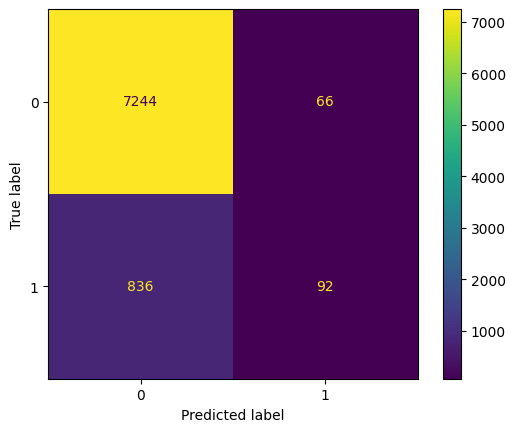

In [22]:
# More Random Forest Evaluation Metrics

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [23]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.890507404709881
Precision: 0.5822784810126582
Recall: 0.09913793103448276


<Axes: >

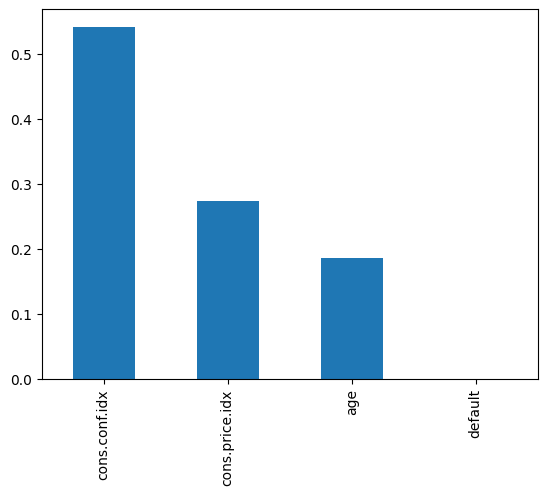

In [24]:
# plots the importance of each feature, using the
# model’s internal score to find the best way to split the
# data within each decision tree.

# Create a series containing feature importances from the model and
# feature names from the training data

importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot.bar()